In [1]:
import numpy as np

In [1]:
from util import *

In [2]:
Nx = 41

In [4]:
for N,mc in models.items():
    model = mc(Nx)
    print(N, " : ",count_parameters(model))

PureStencil  :  3
PureLinear  :  1599
DeepStencil  :  556
LeakyDeepStencil  :  556
LeakyFCMLP  :  28339
FCMLP  :  28339


In [5]:
41*100*10

41000

In [1]:
for N,mc in discriminators.items():
    model = mc(Nx,3)
    print(N, " : ",count_parameters(model))

NameError: name 'discriminators' is not defined

In [9]:
import itertools

In [2]:
LeakyDeepStencil(5,1,1)

TypeError: torch.nn.modules.activation.LeakyReLU is not a Module subclass

# Plot against the analytical solutions

In [10]:
num = np.loadtxt("data/numerical_methods")

In [15]:
lax = num[:,:41]
gudonov = num[:,41:]

In [16]:
lax.shape

(100, 41)

In [17]:
gudonov.shape

(100, 41)

In [21]:
from matplotlib import pylab as plt
%matplotlib inline

0
19
39
59
79
99


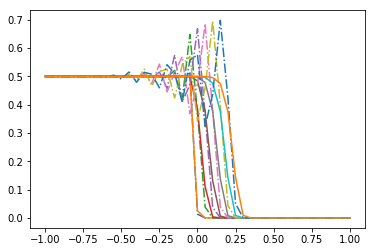

In [35]:
x = np.linspace(-1,1,41)
for i in [0]+list(range(19,100,20)):
    print(i)
    plt.plot(x,lax[i,:],'-.')
    plt.plot(x,gudonov[i,:])
plt.show()